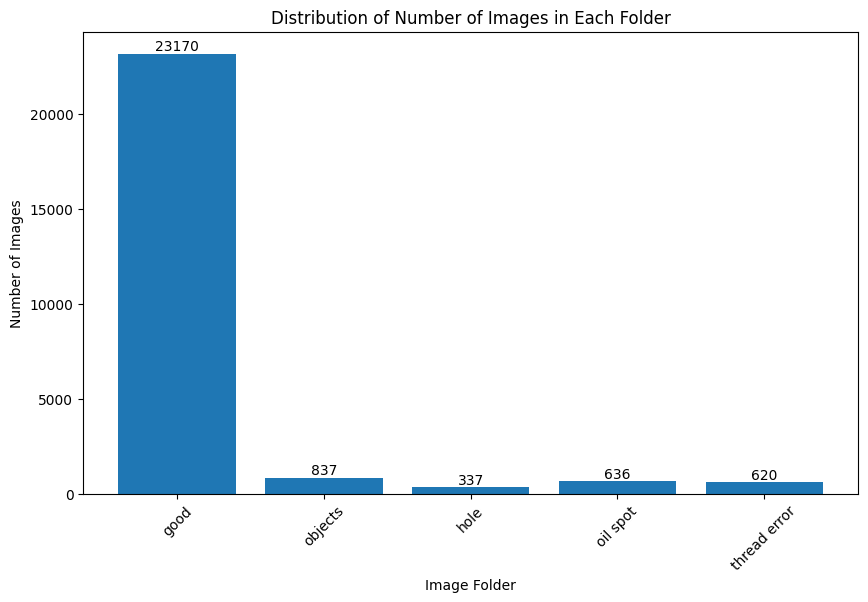

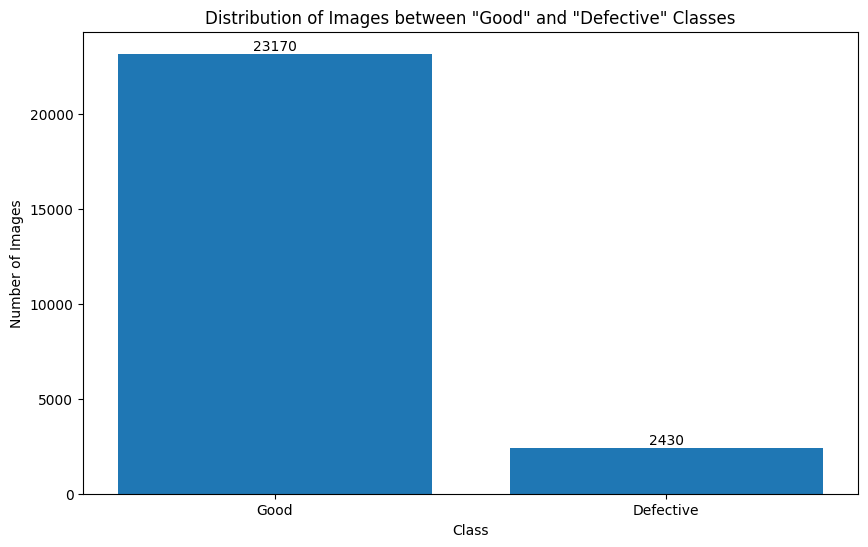

In [1]:
import os
import matplotlib.pyplot as plt

# Define the image folders
image_folders = [
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/good/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/objects/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/hole/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/oil spot/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/thread error/'
]

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith('.png')])

# Get the number of images in each folder
image_counts = [count_images_in_folder(folder) for folder in image_folders]

# Plot the distribution of the number of images inside each folder
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(image_folders)), image_counts)
plt.xticks(range(len(image_folders)), [os.path.basename(folder.rstrip('/')) for folder in image_folders], rotation=45)
plt.xlabel('Image Folder')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Folder')

# Add text labels with the exact number of images above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

# Calculate the total number of defective images (excluding the 'good' folder)
defective_count = sum(image_counts[1:])

# Plot the distribution between the number of images in the 'good' folder and the defective class
plt.figure(figsize=(10, 6))
bars = plt.bar(['Good', 'Defective'], [image_counts[0], defective_count])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images between "Good" and "Defective" Classes')

# Add text labels with the exact number of images above each bar
for bar, count in zip(bars, [image_counts[0], defective_count]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

In [2]:
import os
import shutil

# Danh sách các thư mục chứa ảnh
image_folders = [
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/objects/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/hole/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/oil spot/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/thread error/'
]

destination_folder = '/home/eyecode-binh/Fabric_Defect_Detection/defective/'

os.makedirs(destination_folder, exist_ok=True)

for folder in image_folders:
    if os.path.exists(folder):
        for file_name in os.listdir(folder):
            source_file = os.path.join(folder, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            if os.path.isfile(source_file):
                shutil.copy2(source_file, destination_file)

print("Đã gộp tất cả ảnh vào thư mục defective.")

Đã gộp tất cả ảnh vào thư mục defective.


In [4]:
import os
import cv2
from PIL import Image
import albumentations as A
import numpy as np

def augment_image(image_path, output_folder, num_augmentations):
    image = Image.open(image_path)

    # Define the augmentations to apply
    augmentations = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Rotate(limit=180,
                 interpolation=cv2.INTER_LANCZOS4, 
                 border_mode=cv2.BORDER_REFLECT, 
                 p=0.5),
        A.RandomBrightnessContrast(p=0.5),
    ])

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i in range(num_augmentations):
        augmented_image = augmentations(image=np.array(image))['image']
        new_image_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_path))[0]}_{i+1}.png")
        Image.fromarray(augmented_image).save(new_image_path)

input_folder = '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/defective/'
output_folder = '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/defective_augmented/'

for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, output_folder, 9)

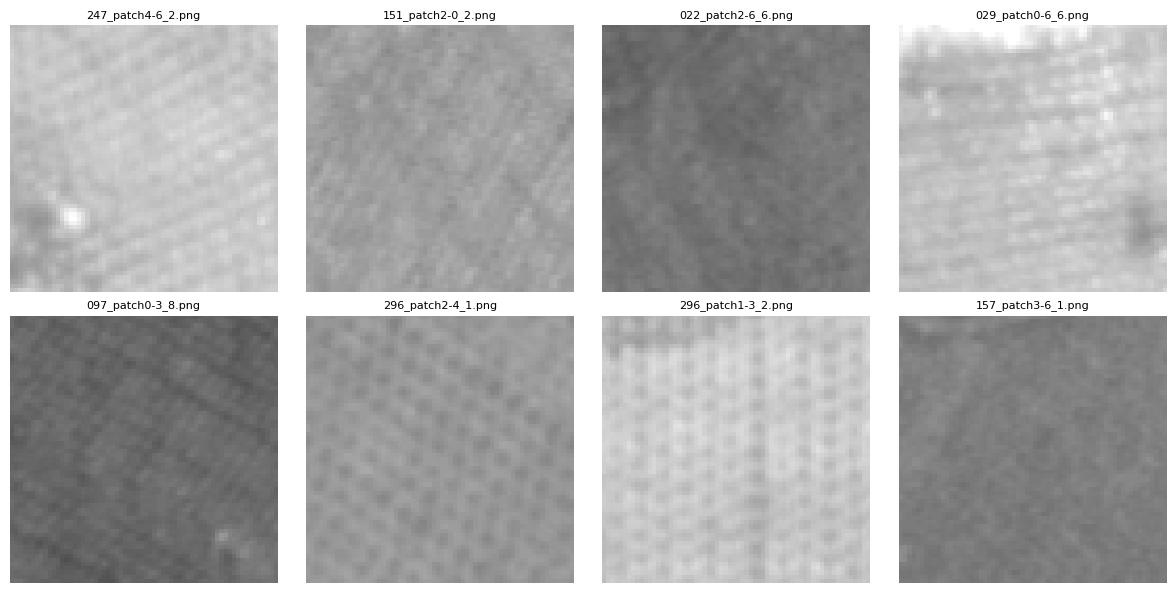

In [5]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images(folder_path, num_images=8, rows=2, cols=4):
    image_files = os.listdir(folder_path)
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(12, 6))
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(folder_path, image_file)
        image = plt.imread(image_path)

        plt.subplot(rows, cols, i+1)
        plt.imshow(image)
        plt.title(image_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

augmented_folder = '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/defective_augmented/'
display_random_images(augmented_folder)

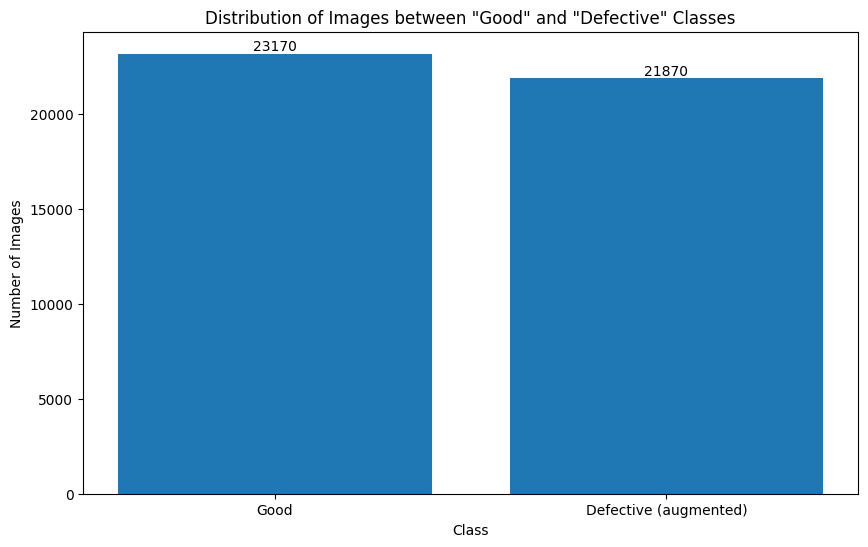

In [6]:
image_folders = [
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/good/',
    '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/defective_augmented/'
]

image_counts = [count_images_in_folder(folder) for folder in image_folders]

plt.figure(figsize=(10, 6))
bars = plt.bar(['Good', 'Defective (augmented)'], [image_counts[0], image_counts[1]])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images between "Good" and "Defective" Classes')

for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

In [7]:
import os
import random
import shutil

def create_subfolders(root_folder, subfolders):
    for subfolder in subfolders:
        folder_path = os.path.join(root_folder, subfolder)
        os.makedirs(folder_path, exist_ok=True)

def split_dataset(input_folder, output_folder, class_name, split_proportions=[0.7, 0.2, 0.1]):
    image_files = os.listdir(input_folder)
    random.shuffle(image_files)

    num_images = len(image_files)
    num_train = int(num_images * split_proportions[0])
    num_valid = int(num_images * split_proportions[1])
    num_test = int(num_images * split_proportions[2])

    train_files = image_files[:num_train]
    valid_files = image_files[num_train:num_train + num_valid]
    test_files = image_files[num_train + num_valid:]

    for subset, subset_folder in zip([train_files, valid_files, test_files], ['train', 'val', 'test']):
        class_folder = os.path.join(output_folder, subset_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)
        for image_file in subset:
            source_path = os.path.join(input_folder, image_file)
            destination_path = os.path.join(class_folder, image_file)
            shutil.copy(source_path, destination_path)

output_folder = '/home/eyecode-binh/Fabric_Defect_Detection/dataset/'
input_folder_defective = '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/defective_augmented/'
input_folder_good = '/home/eyecode-binh/Fabric_Defect_Detection/tilda-400-64x64-patches/versions/1/good/'

# Step 1: Create the required folders
create_subfolders(output_folder, ['train/good', 'train/defective', 'val/good', 'val/defective', 'test/good', 'test/defective'])

split_dataset(input_folder_defective, output_folder, 'defective')
split_dataset(input_folder_good, output_folder, 'good')

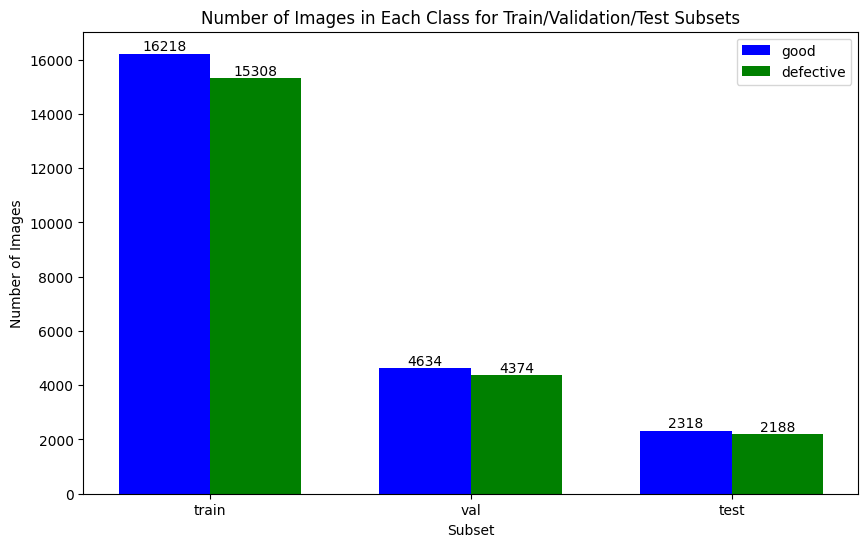

In [8]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith('.png')])

def count_images_in_subfolders(root_folder, subfolders):
    image_counts = {}
    for subset_folder in subfolders:
        subset_path = os.path.join(root_folder, subset_folder)
        good_folder = os.path.join(subset_path, 'good')
        defective_folder = os.path.join(subset_path, 'defective')
        good_count = count_images_in_folder(good_folder)
        defective_count = count_images_in_folder(defective_folder)
        image_counts[subset_folder] = {'good': good_count, 'defective': defective_count}
    return image_counts

def plot_bar_chart(image_counts):
    subsets = list(image_counts.keys())
    classes = ['good', 'defective']
    colors = ['b', 'g']

    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = [0, 1, 2]

    for i, cls in enumerate(classes):
        counts = [image_counts[subset][cls] for subset in subsets]
        bars = plt.bar([ind + i * bar_width for ind in index], counts, width=bar_width, color=colors[i], label=cls)
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

    plt.xlabel('Subset')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Class for Train/Validation/Test Subsets')
    plt.xticks([ind + bar_width / 2 for ind in index], subsets)
    plt.legend()
    plt.show()

output_folder = '/home/eyecode-binh/Fabric_Defect_Detection/dataset/'

subsets = ['train', 'val', 'test']
image_counts = count_images_in_subfolders(output_folder, subsets)

plot_bar_chart(image_counts)